In [1]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Intro Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. 

Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. 

De forma que vamos a probar a realizar **ajustes lineales** con el fin de predecir alguna de sus **variables**. 
Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

# Objetivos

Los objetivos de hoy son:

- Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables **numéricas** y **categóricas**, primando que haya más de una variable de tipo numérico.
- Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten **ligeramente limpios** para facilitar los análisis.
- Explicar los **datos** y las **variables** disponibles en el conjunto de datos seleccionado:
- Esto se hace para que **comprendais** mejor los datos con los que estais trabajando.
- Realizar un **EDA** sencillo para la variable **dependiente** y la variable **independiente**.

In [49]:
df = pd.read_csv("data/01-dataframe_fumadores.csv", index_col = 0).reset_index()
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,11,62,female,26.29,0,yes,southeast,27808.7251


## Entender las variables que tenemos y como es nuetro dataframe. 

In [50]:
# número de filas y columnas del dataframe

df.shape

(274, 8)

In [51]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     274 non-null    int64  
 1   age       274 non-null    int64  
 2   sex       274 non-null    object 
 3   bmi       274 non-null    float64
 4   children  274 non-null    int64  
 5   smoker    274 non-null    object 
 6   region    274 non-null    object 
 7   charges   274 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.2+ KB


In [52]:
# nombre de las columnas de nuestro dataframe

df.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [53]:
# principales estadísticos de las columnas numéricas. recordemos que por defecto el describe nos devuelve las numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,274.0,672.470803,406.050495,0.0000,293.000000,685.50000,1032.500000,1337.00000
age,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000
bmi,274.0,30.708449,6.318644,17.1950,26.083750,30.44750,35.200000,52.58000
children,274.0,1.113139,1.157066,0.0000,0.000000,1.00000,2.000000,5.00000
charges,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [54]:
# principales estadisticos de las variables categóricas

df.describe(include ="object").T

,count,unique,top,freq
sex,274,2,male,159
smoker,274,1,yes,274
region,274,4,southeast,91


In [55]:
# valores nulos en el dataframe

df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
# duplicados 

df.duplicated().sum()

0

In [57]:
df[df.duplicated()== True] # Para ver la fila duplicada

,index,age,sex,bmi,children,smoker,region,charges


In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.duplicated().sum()

0

# Outliers

In [60]:
numericas = df.select_dtypes(include=[np.number])
numericas.head(2)

,index,age,bmi,children,charges
0,0,19,27.90,0,16884.9240
1,11,62,26.29,0,27808.7251


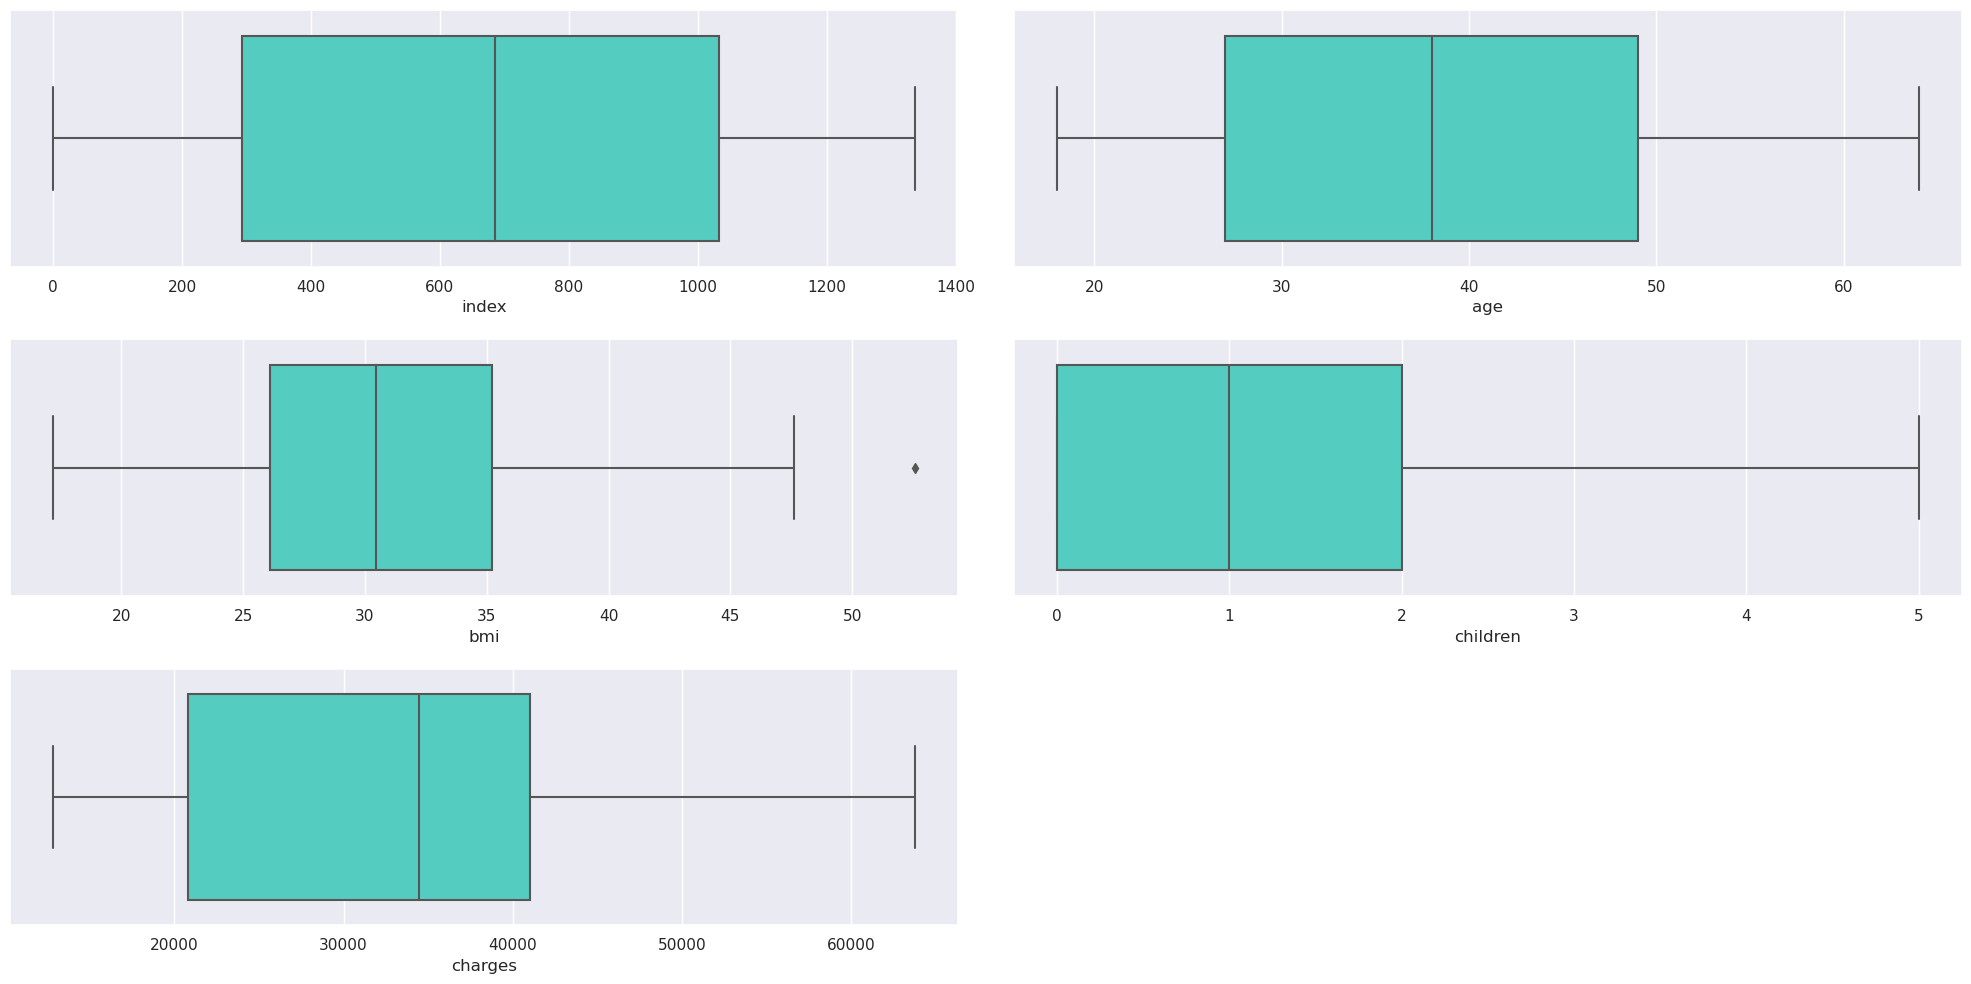

In [61]:
fig, axes = plt.subplots(3,2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad
   
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [62]:
df.shape

(274, 8)

Detectar valores de los outliers

In [63]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [64]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)

In [65]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['bmi'])

## Evaluar cuáles de las columnas tendremos que limpiar en nuestro *dataframe* y limpiarlas. 

### Gestión de *outliers*

Lo primero que haremos será chequear de nuevo los principales estadísticos de nuestras columnas para decidir con que valor reemplazamos los *outliers* 

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,274.0,672.470803,406.050495,0.0000,293.000000,685.50000,1032.500000,1337.00000
age,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000
bmi,274.0,30.708449,6.318644,17.1950,26.083750,30.44750,35.200000,52.58000
children,274.0,1.113139,1.157066,0.0000,0.000000,1.00000,2.000000,5.00000
charges,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


## Analizar las relaciones entre las variables. 

### Variable respuesta

In [67]:
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,11,62,female,26.29,0,yes,southeast,27808.7251


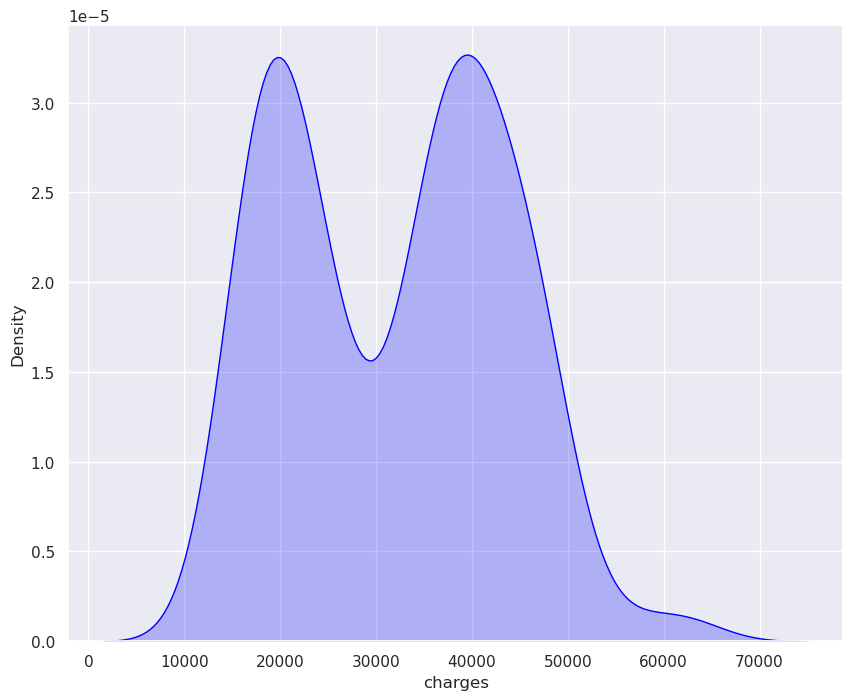

In [68]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


### Variables predictoras

#### Variables numéricas

In [69]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
index,274.0,672.470803,406.050495,0.0000,293.000000,685.50000,1032.500000,1337.00000
age,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000
bmi,274.0,30.708449,6.318644,17.1950,26.083750,30.44750,35.200000,52.58000
children,274.0,1.113139,1.157066,0.0000,0.000000,1.00000,2.000000,5.00000
charges,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


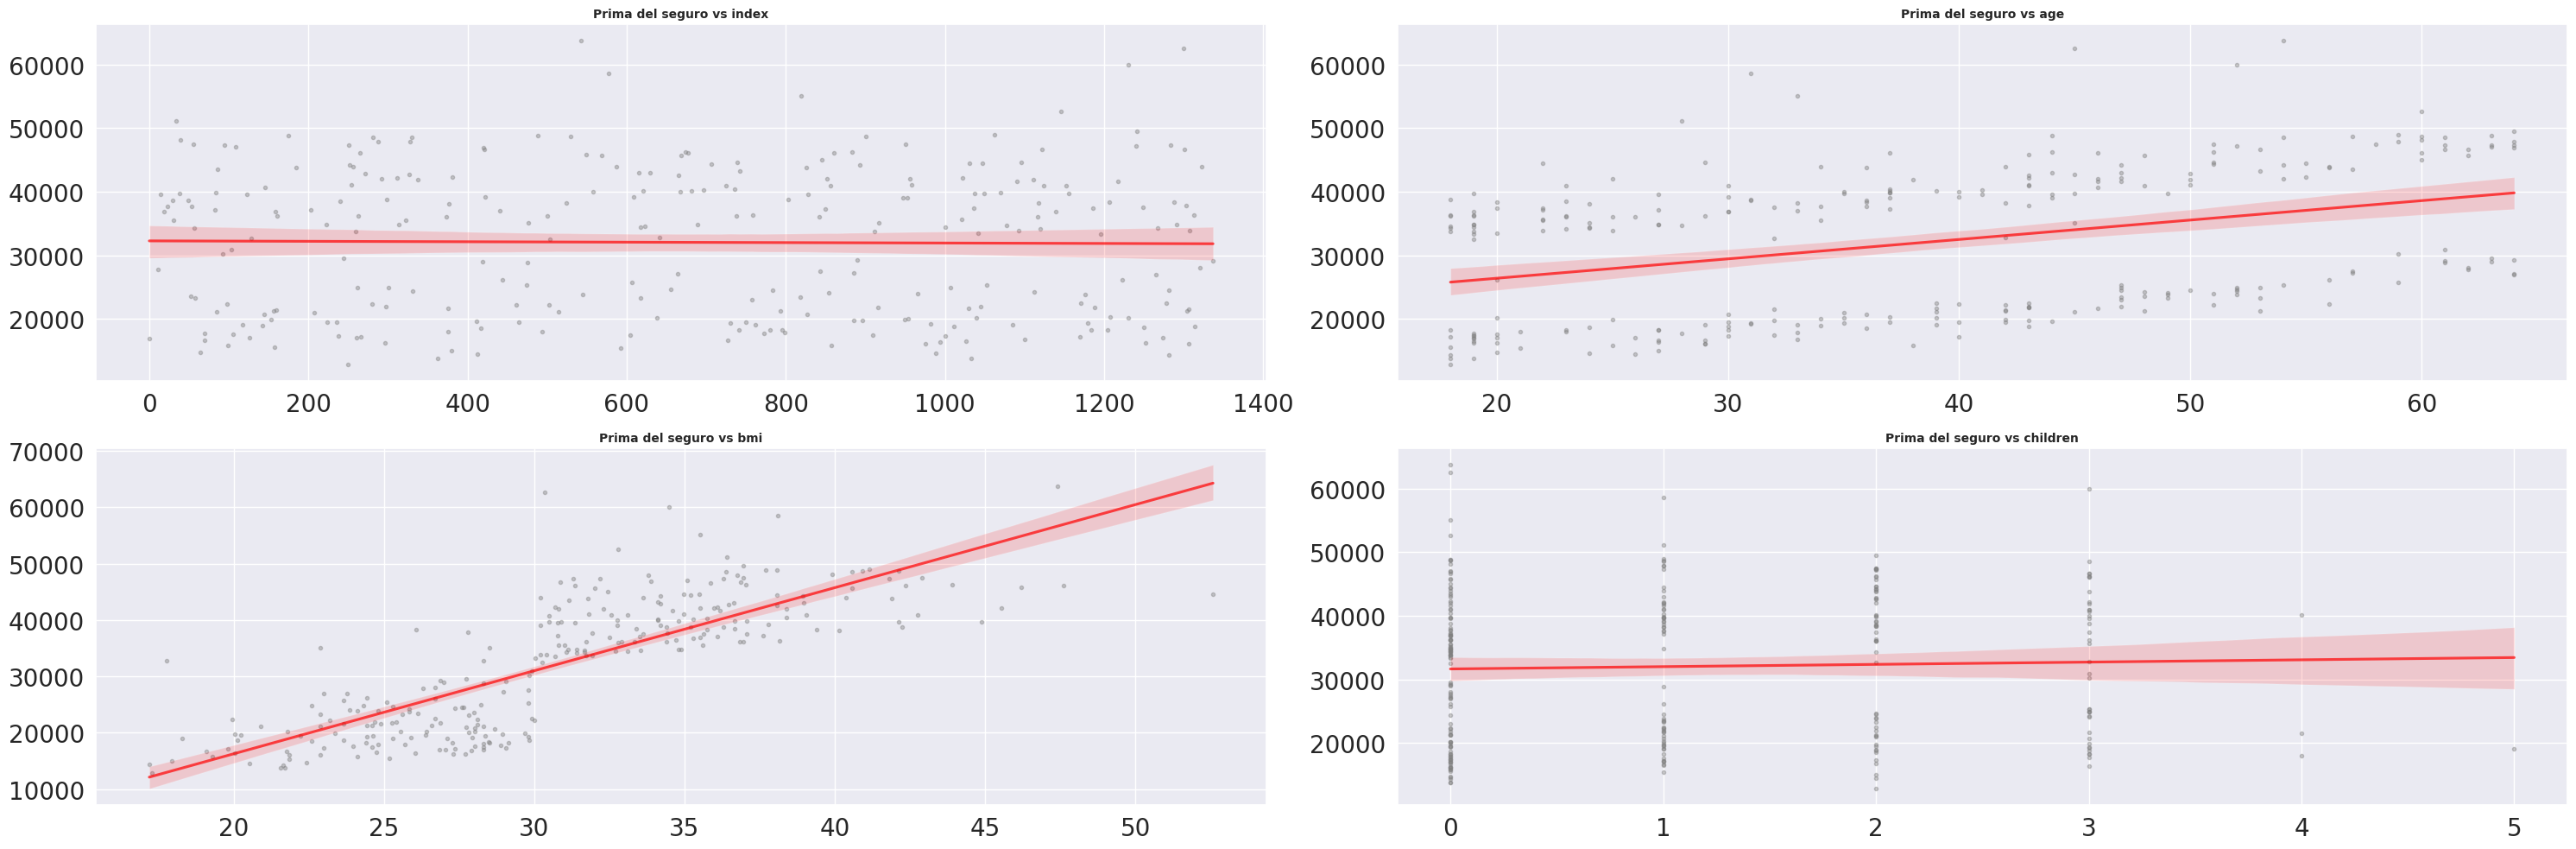

In [70]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

#### Correlación entre variables numéricas

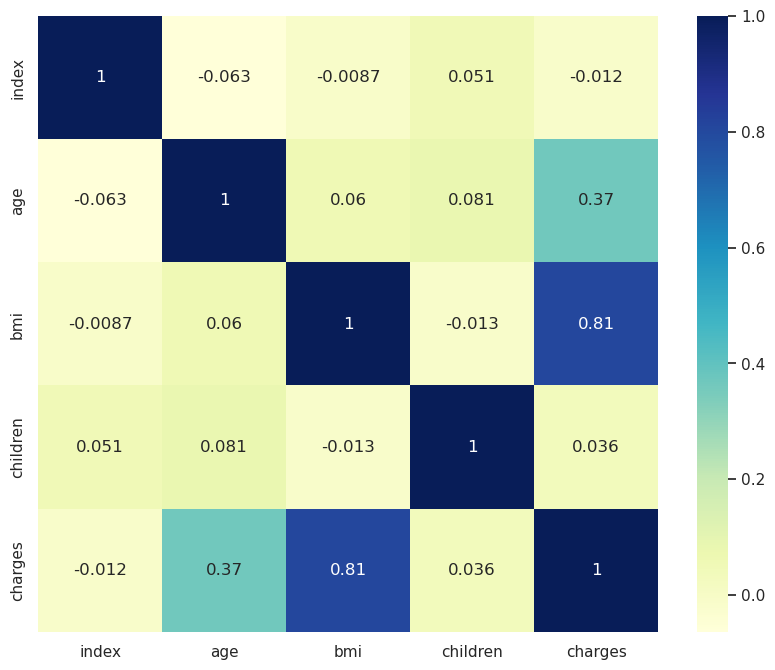

In [71]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

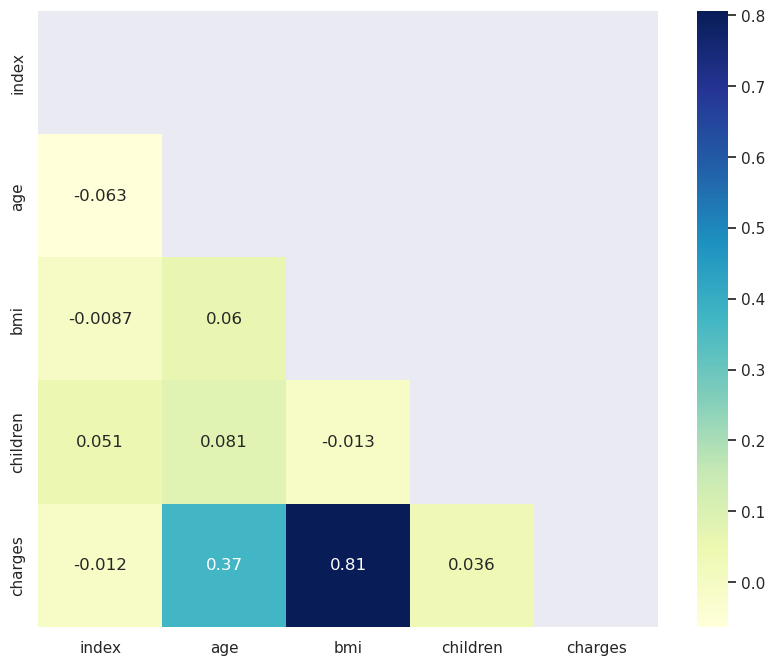

In [72]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

#### Variables categóricas

In [73]:
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,11,62,female,26.29,0,yes,southeast,27808.7251


In [74]:
categoricas = df.select_dtypes(include = 'object').describe().T
categoricas.head()

,count,unique,top,freq
sex,274,2,male,159
smoker,274,1,yes,274
region,274,4,southeast,91


# Region

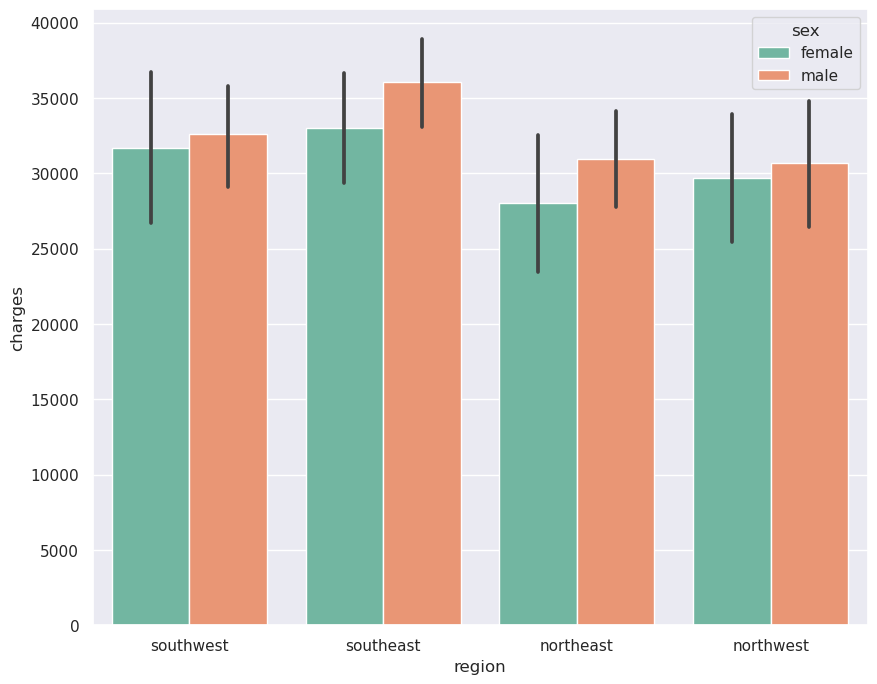

In [87]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2');

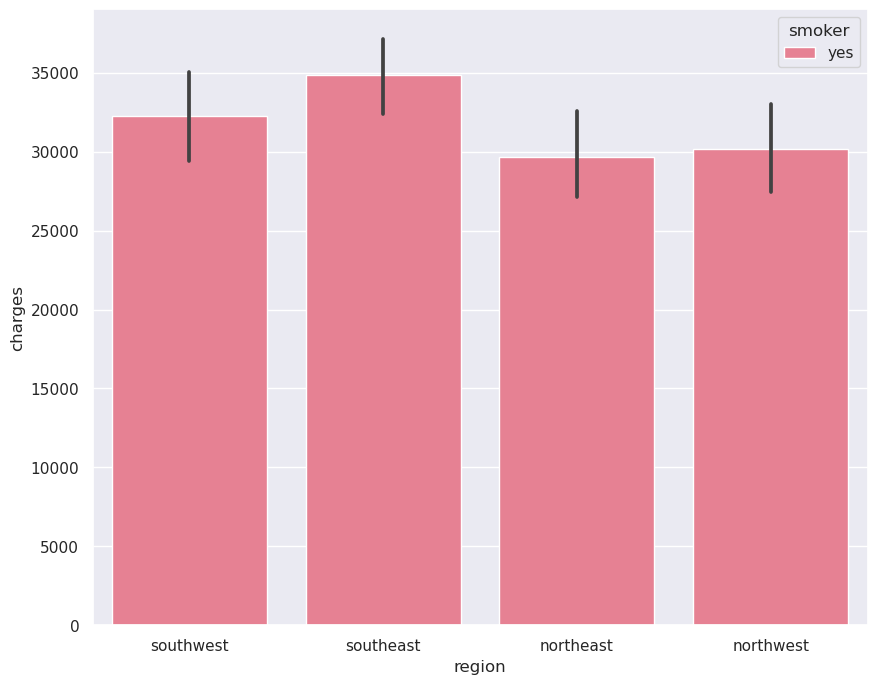

In [76]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='husl');

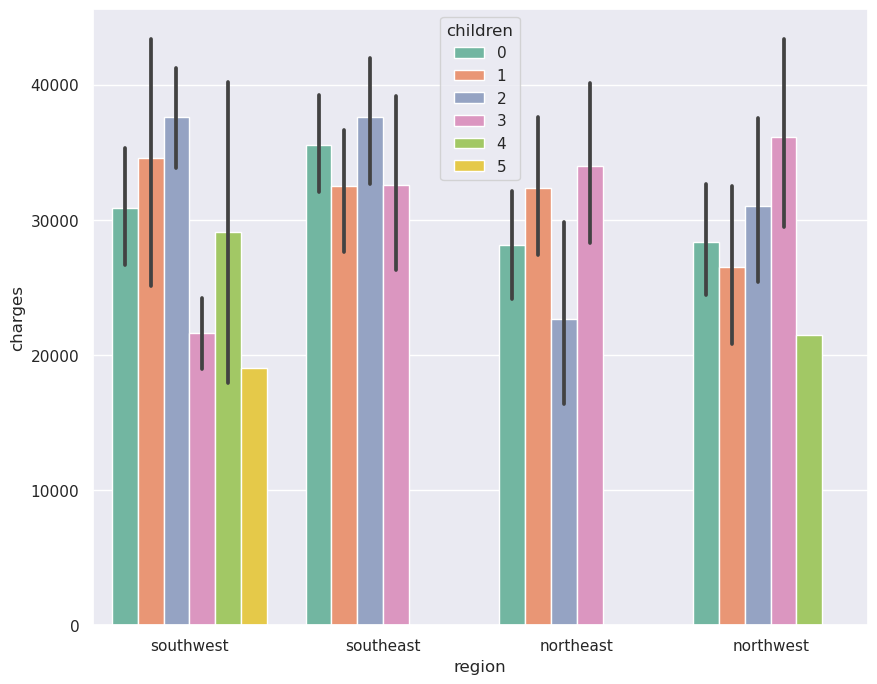

In [77]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2');

# Children

<AxesSubplot:xlabel='children', ylabel='charges'>

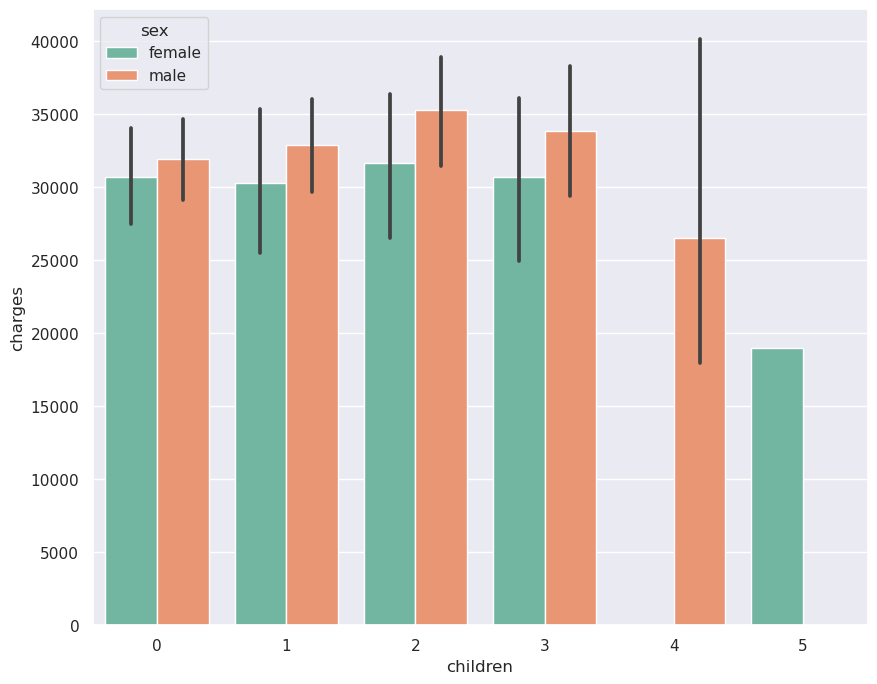

In [78]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='Set2')

<AxesSubplot:xlabel='children', ylabel='charges'>

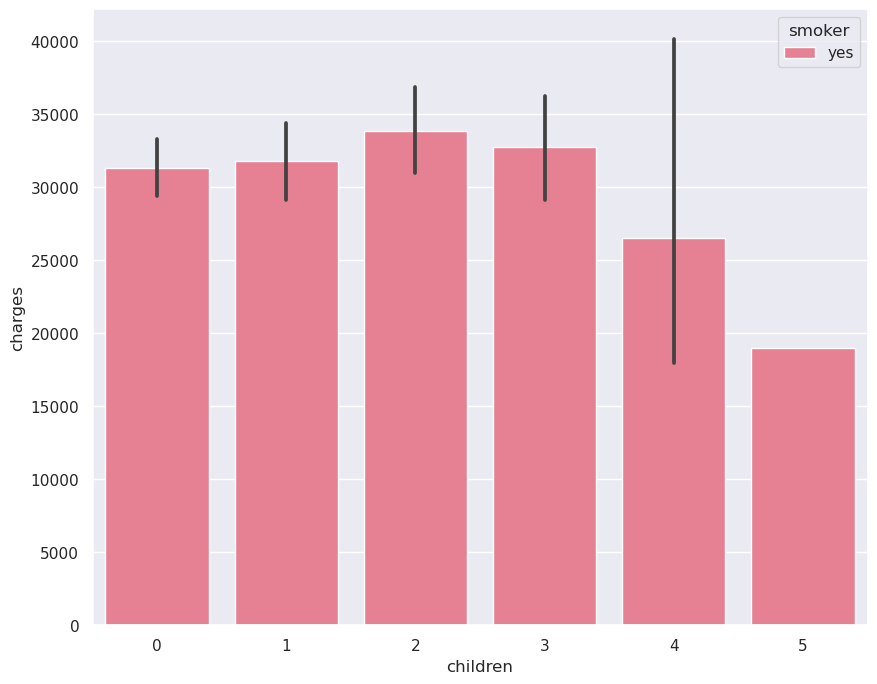

In [79]:
sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=df, palette='husl')

<AxesSubplot:xlabel='children', ylabel='charges'>

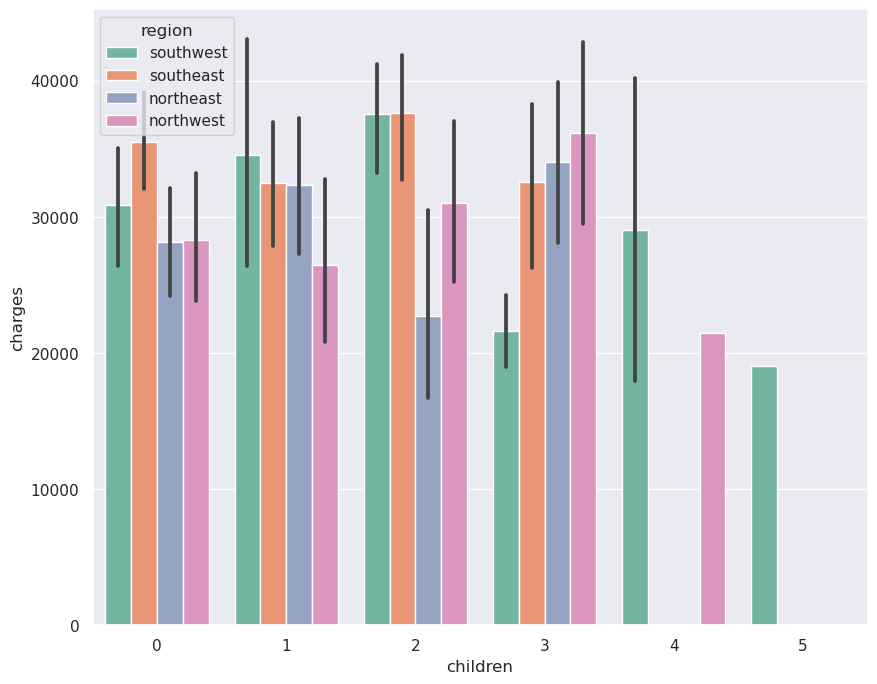

In [80]:
sns.barplot(x='children', y='charges', hue='region', data=df, palette='Set2')

# Smoker

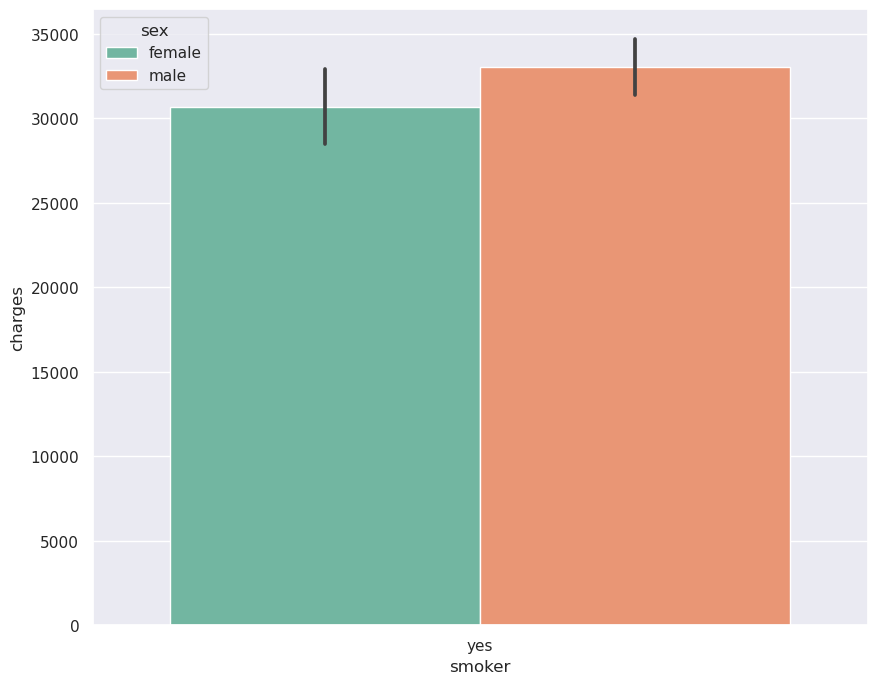

In [81]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2');

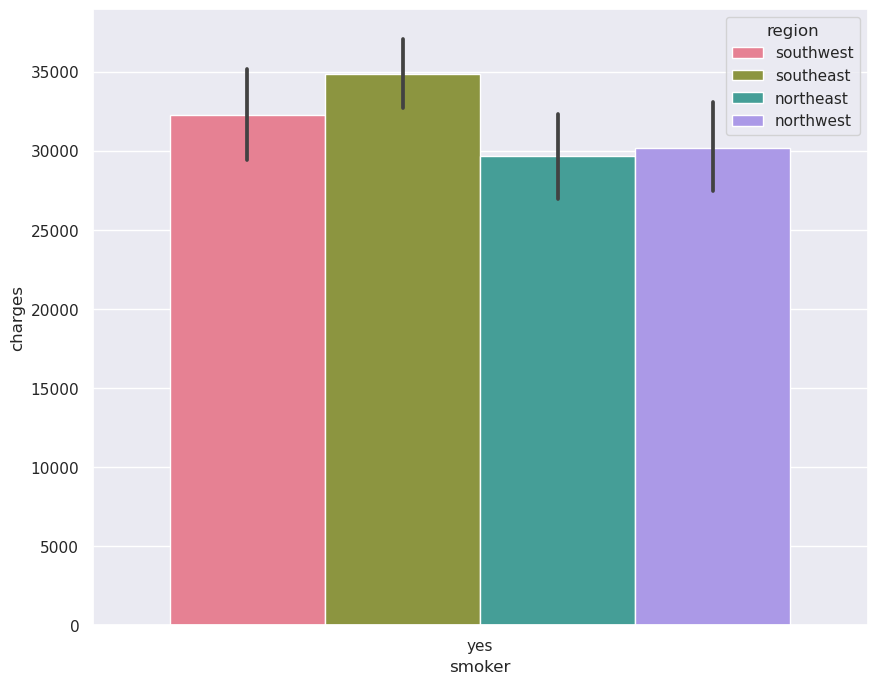

In [82]:
sns.barplot(x = 'smoker', y = 'charges',
                 hue='region', data=df, palette='husl');

<AxesSubplot:xlabel='smoker', ylabel='charges'>

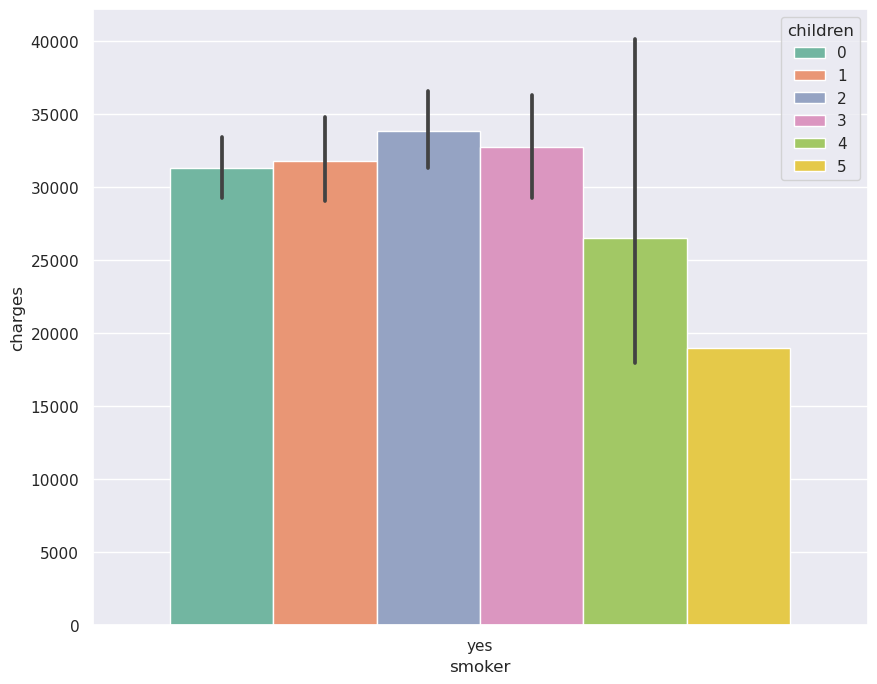

In [83]:
sns.barplot(x='smoker', y='charges', hue='children', data=df, palette='Set2')